<a href="https://colab.research.google.com/github/Emelsmsk/electricity_price/blob/main/electricity_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv")
print(data.head())

           DateTime Holiday  HolidayFlag  DayOfWeek  WeekOfYear  Day  Month  \
0  01/11/2011 00:00     NaN            0          1          44    1     11   
1  01/11/2011 00:30     NaN            0          1          44    1     11   
2  01/11/2011 01:00     NaN            0          1          44    1     11   
3  01/11/2011 01:30     NaN            0          1          44    1     11   
4  01/11/2011 02:00     NaN            0          1          44    1     11   

   Year  PeriodOfDay ForecastWindProduction SystemLoadEA  SMPEA  \
0  2011            0                 315.31      3388.77  49.26   
1  2011            1                 321.80      3196.66  49.26   
2  2011            2                 328.57      3060.71  49.10   
3  2011            3                 335.60      2945.56  48.04   
4  2011            4                 342.90      2849.34  33.75   

  ORKTemperature ORKWindspeed CO2Intensity ActualWindProduction SystemLoadEP2  \
0           6.00         9.30       600.7

<ipython-input-1-fab44446a969>:3: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv")


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [3]:
data.isnull().sum()

,0
DateTime,0
Holiday,36478
HolidayFlag,0
DayOfWeek,0
WeekOfYear,0
Day,0
Month,0
Year,0
PeriodOfDay,0
ForecastWindProduction,0


In [4]:
data = data.dropna()

<ipython-input-7-58f4233acb4d>:4: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv")
<ipython-input-7-58f4233acb4d>:7: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['DateTime'] = pd.to_datetime(data['DateTime'])
<ipython-input-7-58f4233acb4d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DateTime'] = pd.to_datetime(data['DateTime'])


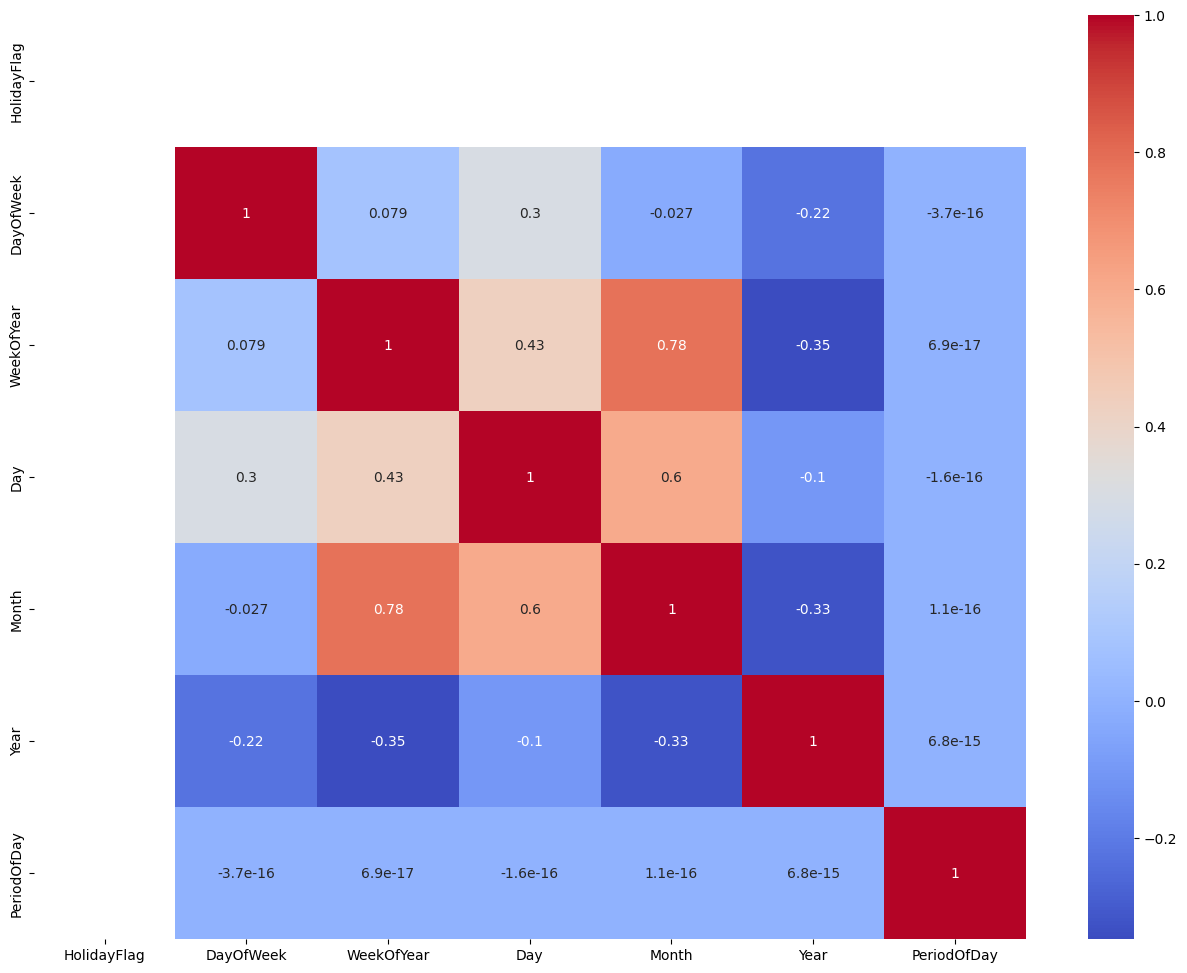

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv")
data = data.dropna()

data['DateTime'] = pd.to_datetime(data['DateTime'])

numerical_features = data.select_dtypes(include=['number'])

correlations = numerical_features.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [10]:
x = data[["Day", "Month", "ForecastWindProduction", "SystemLoadEA",
    "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity",
            "ActualWindProduction", "SystemLoadEP2"]]
y = data["SMPEP2"]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

<ipython-input-32-3ce2fad8704d>:7: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv")


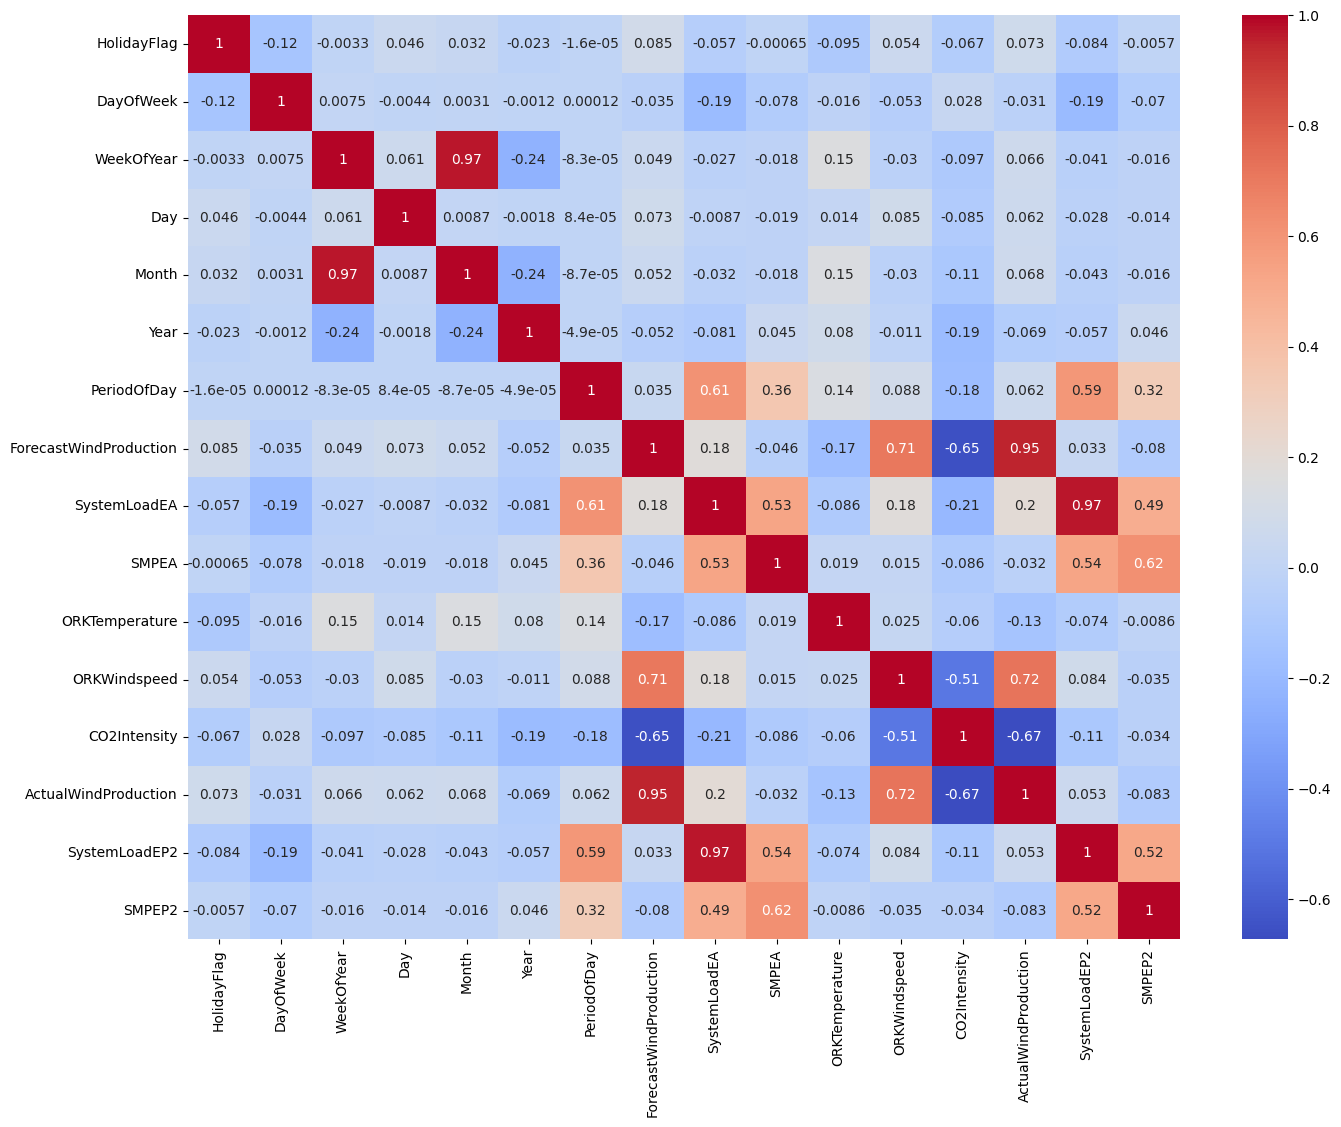

TypeError: RandomForestRegressor.__init__() got an unexpected keyword argument 'min_impurty_split'

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv")

for col in data.select_dtypes(include=['object']).columns:
    if col == 'DateTime':
        continue
    data[col] = pd.to_numeric(data[col], errors='coerce')
for col in data.columns:
    if data[col].dtype == 'number':
        data[col] = data[col].fillna(data[col].mean())
    else:
        mode_values = data[col].mode()
        if not mode_values.empty:
            data[col] = data[col].fillna(mode_values[0])
        else:
            data[col] = data[col].fillna('Unknown')


numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

data['DateTime'] = pd.to_datetime(data['DateTime'], format='%d/%m/%Y %H:%M')

numerical_features = data.select_dtypes(include=['number'])

correlations = numerical_features.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

x = data[["Day", "Month", "ForecastWindProduction", "SystemLoadEA",
          "SMPEA", "ORKTemperature", "SystemLoadEP2"]]
y = data["SMPEP2"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurty_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [43]:
import numpy as np
x = data[["Day", "Month", "ForecastWindProduction", "SystemLoadEA", "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity"]]
features = np.array([[10, 12, 54.10, 4241.05, 49.56, 9.0, 4241.05]])
model.predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([69.5203])